Lesson19-1
==

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Загрузка и первоначальная проверка данных

data = pd.read_csv("used_cars_data.csv")
data.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.tail()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
data.isnull().sum()


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
data.nunique()


S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [8]:
data[data.duplicated()]


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


Преобразование данных

 В нашем наборе данных столбец  S.No содержит только значения идентификатора, и он не влияет на прогнозирование зависимой переменной.


In [9]:
data = data.drop(['S.No.'], axis = 1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [10]:
#Создадим новый столбец «Car_Age». 
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


 Скорее, большее влияние может оказывать марка автомобиля, а не конкретная модель. Мы можем обработать этот столбец и сделать его более информативным. Давайте разделим его на два столбца – «Бренд» и «Модель». 


In [11]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data.sample(10)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
5089,Mercedes-Benz New C-Class 220 CDI AT,Kolkata,2012,22000,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,14.00,13,Mercedes-Benz,NewC-Class
2115,Maruti Zen VXI,Kolkata,2009,37000,Petrol,Manual,First,17.3 kmpl,993 CC,60 bhp,5.0,NaN,1.00,16,Maruti,ZenVXI
5915,Chevrolet Enjoy Petrol LS 7 Seater,Mumbai,2014,18000,Petrol,Manual,First,13.7 kmpl,1399 CC,98.82 bhp,7.0,NaN,3.35,11,Chevrolet,EnjoyPetrol
3183,Hyundai Creta 1.6 SX Plus Petrol Automatic,Coimbatore,2018,23875,Petrol,Automatic,First,13.0 kmpl,1591 CC,121.3 bhp,5.0,NaN,14.36,7,Hyundai,Creta1.6
5206,Force One LX 4x4,Kolkata,2014,41000,Diesel,Manual,First,17.0 kmpl,2200 CC,139.01 bhp,7.0,NaN,8.00,11,Force,OneLX
4432,Maruti Alto 800 VXI,Kolkata,2016,24300,Petrol,Manual,First,22.74 kmpl,796 CC,47.3 bhp,5.0,NaN,2.44,9,Maruti,Alto800
5583,Volvo XC60 D4 SUMMUM,Kochi,2014,93144,Diesel,Automatic,First,14.7 kmpl,1984 CC,181 bhp,5.0,NaN,17.15,11,Volvo,XC60D4
6041,Maruti Alto 800 2016-2019 LXI,Kochi,2017,36701,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,NaN,8,Maruti,Alto800
2645,Tata Nano Twist XT,Coimbatore,2015,19963,Petrol,Manual,Second,25.4 kmpl,624 CC,37.5 bhp,4.0,NaN,1.74,10,Tata,NanoTwist
2106,Audi Q3 35 TDI Quattro Premium,Pune,2015,110000,Diesel,Automatic,First,15.73 kmpl,1968 CC,174.33 bhp,5.0,NaN,19.00,10,Audi,Q335


In [12]:
#Изучим столбец “Brand”: 
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


Видим ошибки, которые возникли при заполнении и при отделении марки от модели. Их нужно исправить. 

In [13]:
data["Brand"] = data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"})

In [14]:
del data['Name']


Следующую проблему с типами данных можно заметить со столбцами Mileage, Engine, Power, New_Price – они содержат числовые значения с единицами измерения. В таком виде данные не удастся использовать не только для дальнейшего моделирования, но и для вычисления статистических характеристик. 

In [15]:
data['Mileage_num'] = data.Mileage.str.split().str.get(0)
data['Mileage_units'] = data.Mileage.str.split().str.get(1) 
data['Mileage_num'] = data['Mileage_num'].astype(float)

In [16]:
print(data.isnull().sum())
print(data.Mileage_units.unique())
print(data.info())


Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Car_Age                 0
Brand                   0
Model                   1
Mileage_num             2
Mileage_units           2
dtype: int64
['km/kg' 'kmpl' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-

Замечаем, что в столбце Mileage_units две единицы измерения - km/kg и kmpl. Для корректности моделирования нам нужно унифицировать единицы измерения. Нетрудно выяснить, что 1 km/kg=1.333 kmpl. Внесем соответствующую поправку и удалим лишние столбцы.


In [18]:
data['Mileage'] = data['Mileage_num']*(1+0.333*(data['Mileage_units']=='km/kg'))
del data['Mileage_num']
del data['Mileage_units']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
 13  Brand              7253 non-null   object 
 14  Model              7252 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 850.1+ KB
None


Решение задач
--
Приведите столбцы Engine, Power, New_Price к числовым типам. Проверьте, требуется ли унификация единиц измерения. 


In [19]:
#решение про Engine

data['Engine_num'] = data.Engine.str.split().str.get(0)
data['Engine_units'] = data.Engine.str.split().str.get(1) 
data['Engine'] = data['Engine_num'].astype(float)
del data['Engine_num']
del data['Engine_units']


In [20]:
#решение про Power
data['Power_num'] = data.Power.str.split().str.get(0)
data['Power_units'] = data.Power.str.split().str.get(1) 
#data['Power'] = data['Power_num'].astype(float)

data['Power_num'] = data['Power_num'].replace({"null": np.nan})
data['Power'] = data['Power_num'].astype(float) 
del data['Power_num']
del data['Power_units']


In [21]:
#решение про New_Price
data['New_Price_num'] = data.New_Price.str.split().str.get(0)
data['New_Price_units'] = data.New_Price.str.split().str.get(1) 
data['New_Price_units'].unique()
data['New_Price_num'] = data['New_Price_num'].astype(float)
data['New_Price'] = np.where(data['New_Price_units'] == 'Cr', data['New_Price_num'] * data['Price'], data['New_Price_num'])
del data['New_Price_num']
del data['New_Price_units']


Lesson 19-2
==

In [22]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1003.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,18.224336,1616.573470,112.765214,5.279722,21.339409,9.479468,11.634634
std,3.254421,8.442772e+04,4.779547,595.285137,53.493553,0.811660,23.531486,11.187917,3.254421
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,2.747200,0.440000,6.000000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,7.880000,3.500000,9.000000
50%,2014.000000,5.341600e+04,18.190000,1493.000000,94.000000,5.000000,11.480000,5.640000,11.000000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,25.520000,9.950000,14.000000
max,2019.000000,6.500000e+06,44.708820,5998.000000,616.000000,10.000000,368.000000,160.000000,29.000000


 Одномерный анализ


In [23]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age']


Year


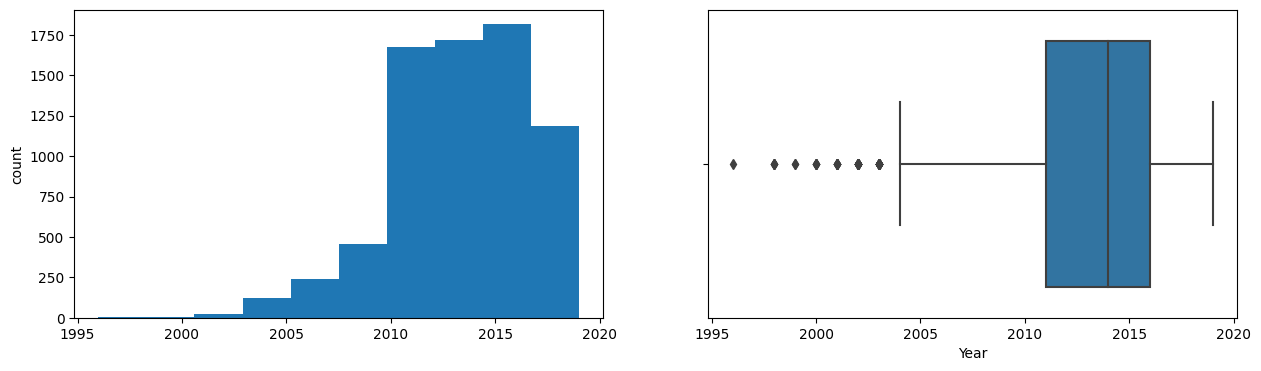

Kilometers_Driven


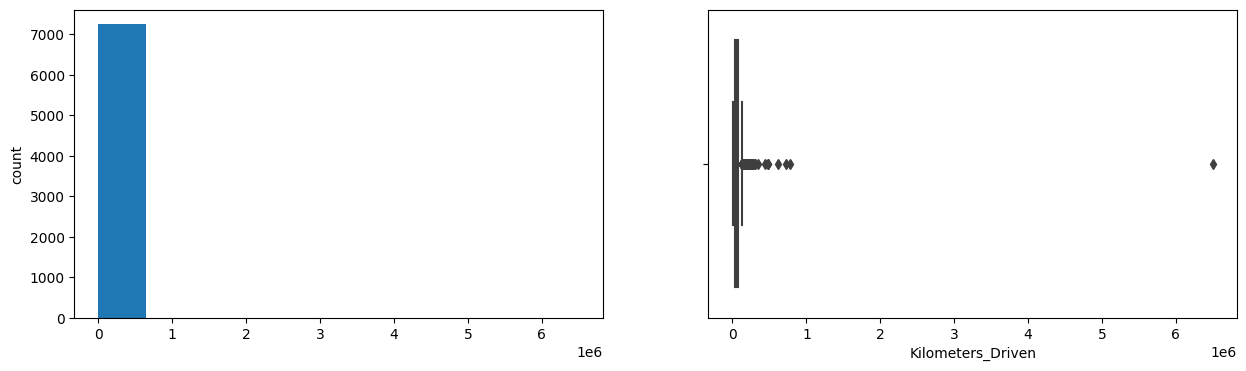

Mileage


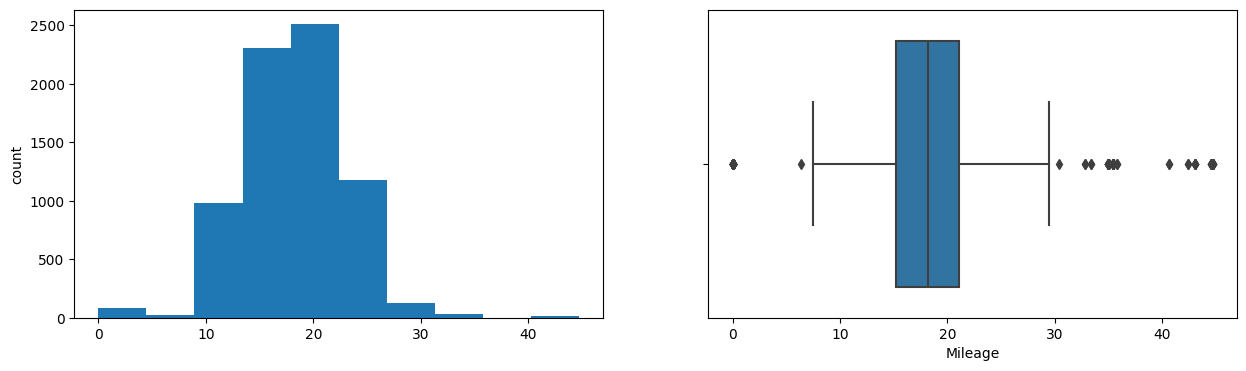

Engine


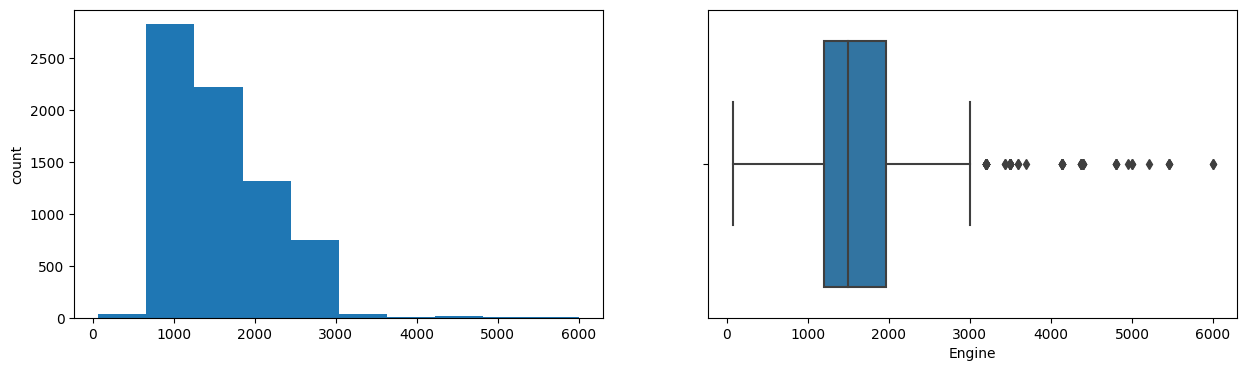

Power


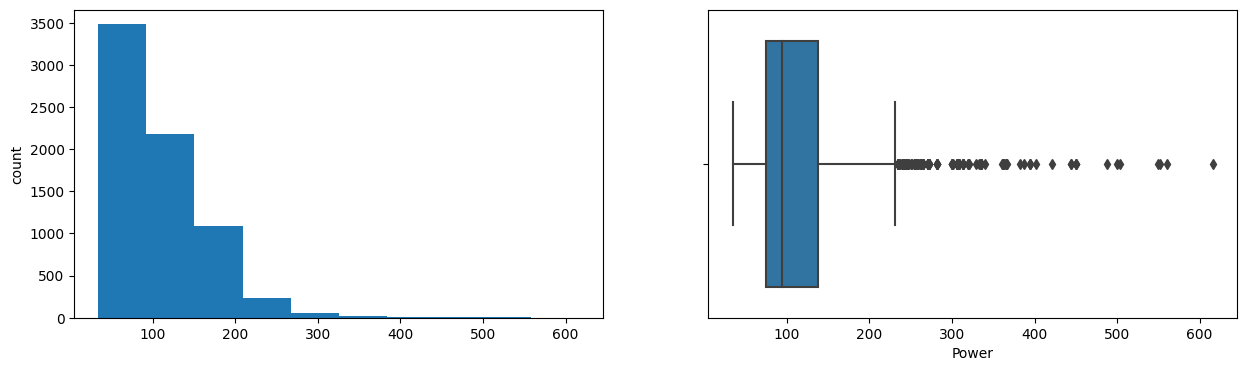

Seats


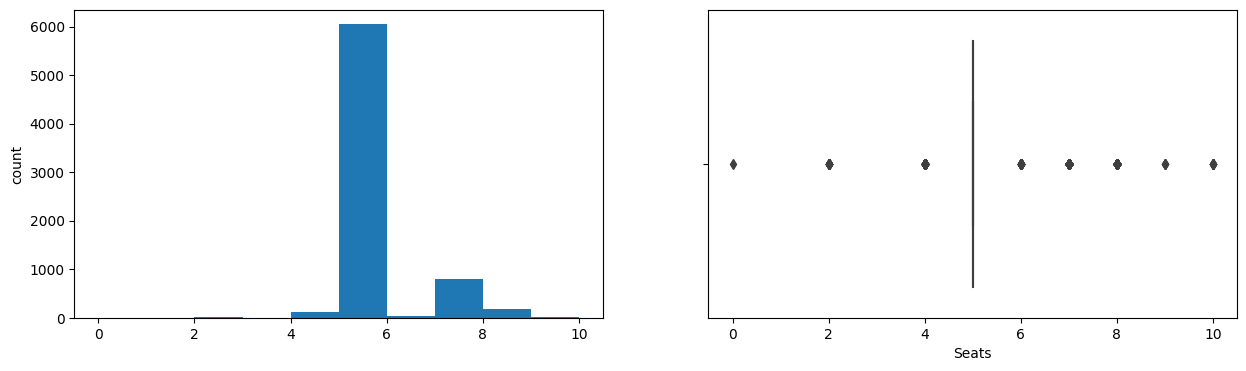

New_Price


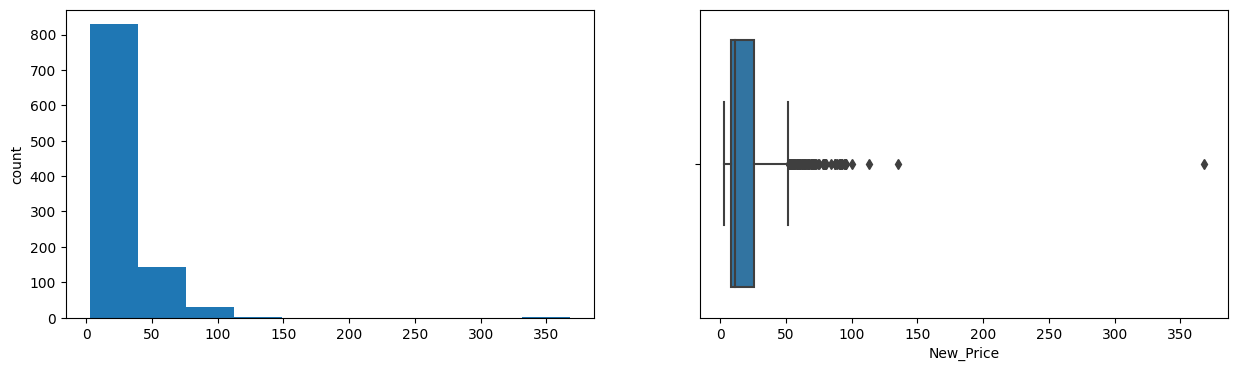

Price


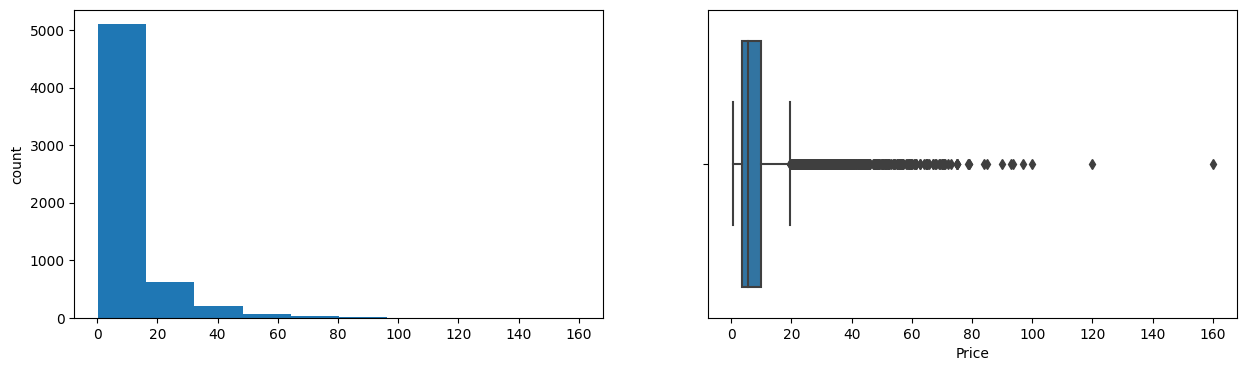

Car_Age


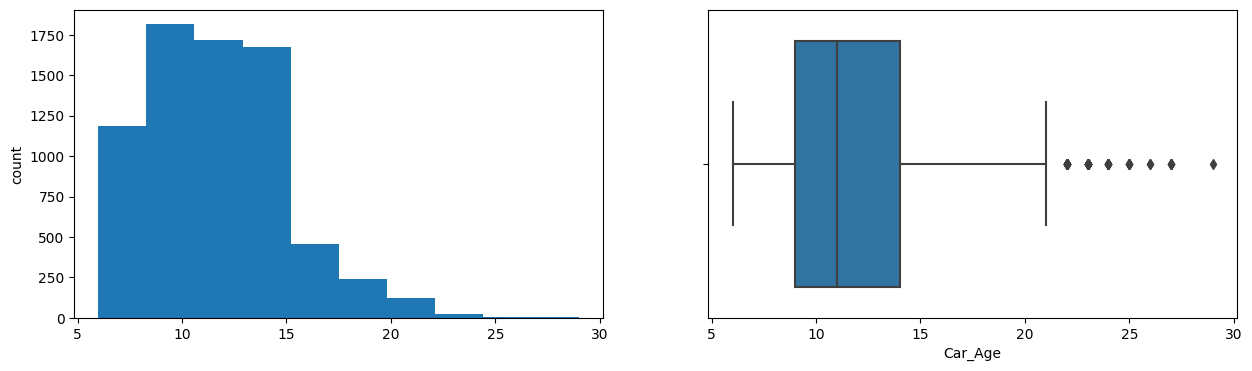

In [24]:
#Начнем с визуализации числовых переменных.
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()


TypeError: 'Axes' object is not subscriptable

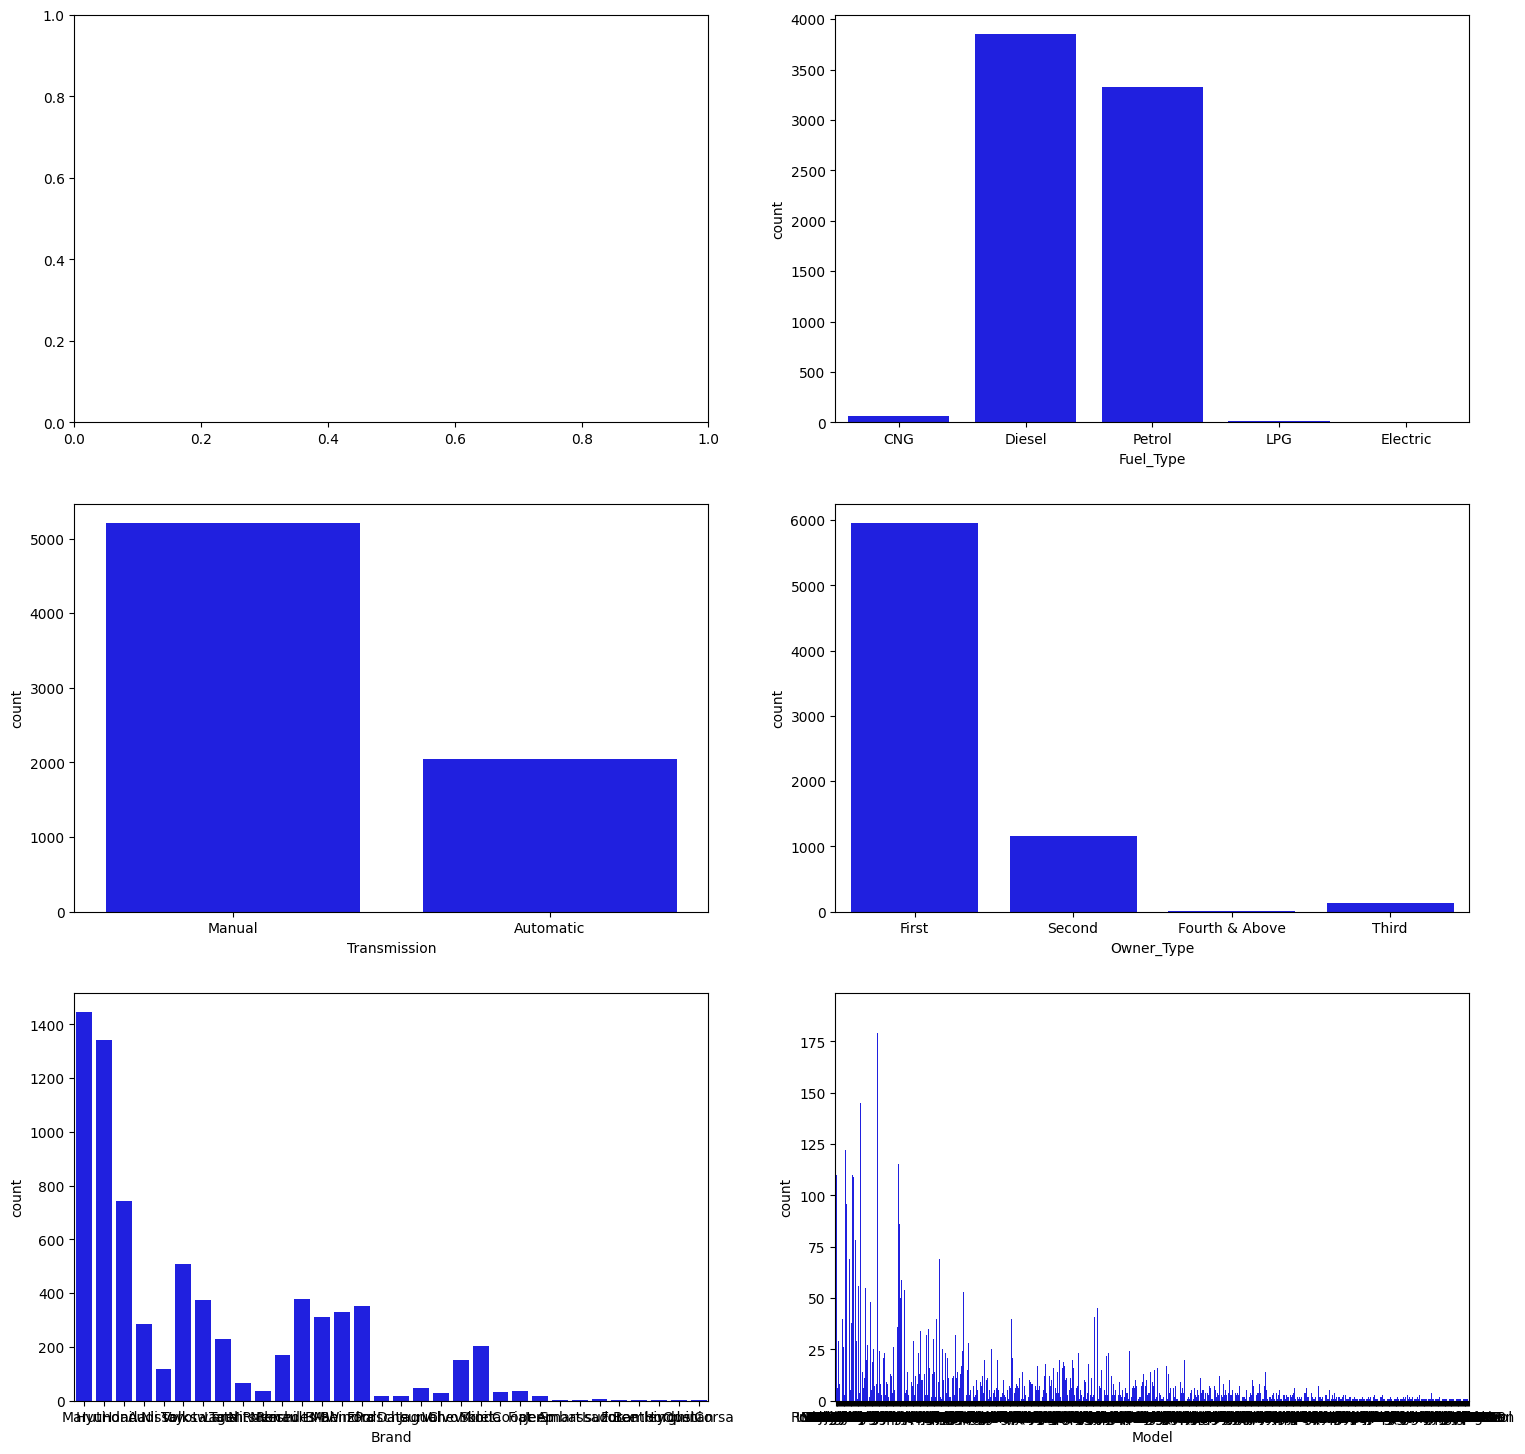

In [40]:
# Теперь визуализируем категориальные переменные с помощью столбчатых диаграмм.
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
axes = axes.flatten()
for i in range(1,len(cat_cols)):
    sns.countplot(ax = axes[i], x = cat_cols[i], data = data, color = 'blue')
axes[0][0].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)
plt.show()


In [26]:
for colname in ['Kilometers_Driven','Price']:
        data[colname + '_log'] = np.log1p(data[colname])


Двумерный анализ
--

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x1700 with 0 Axes>

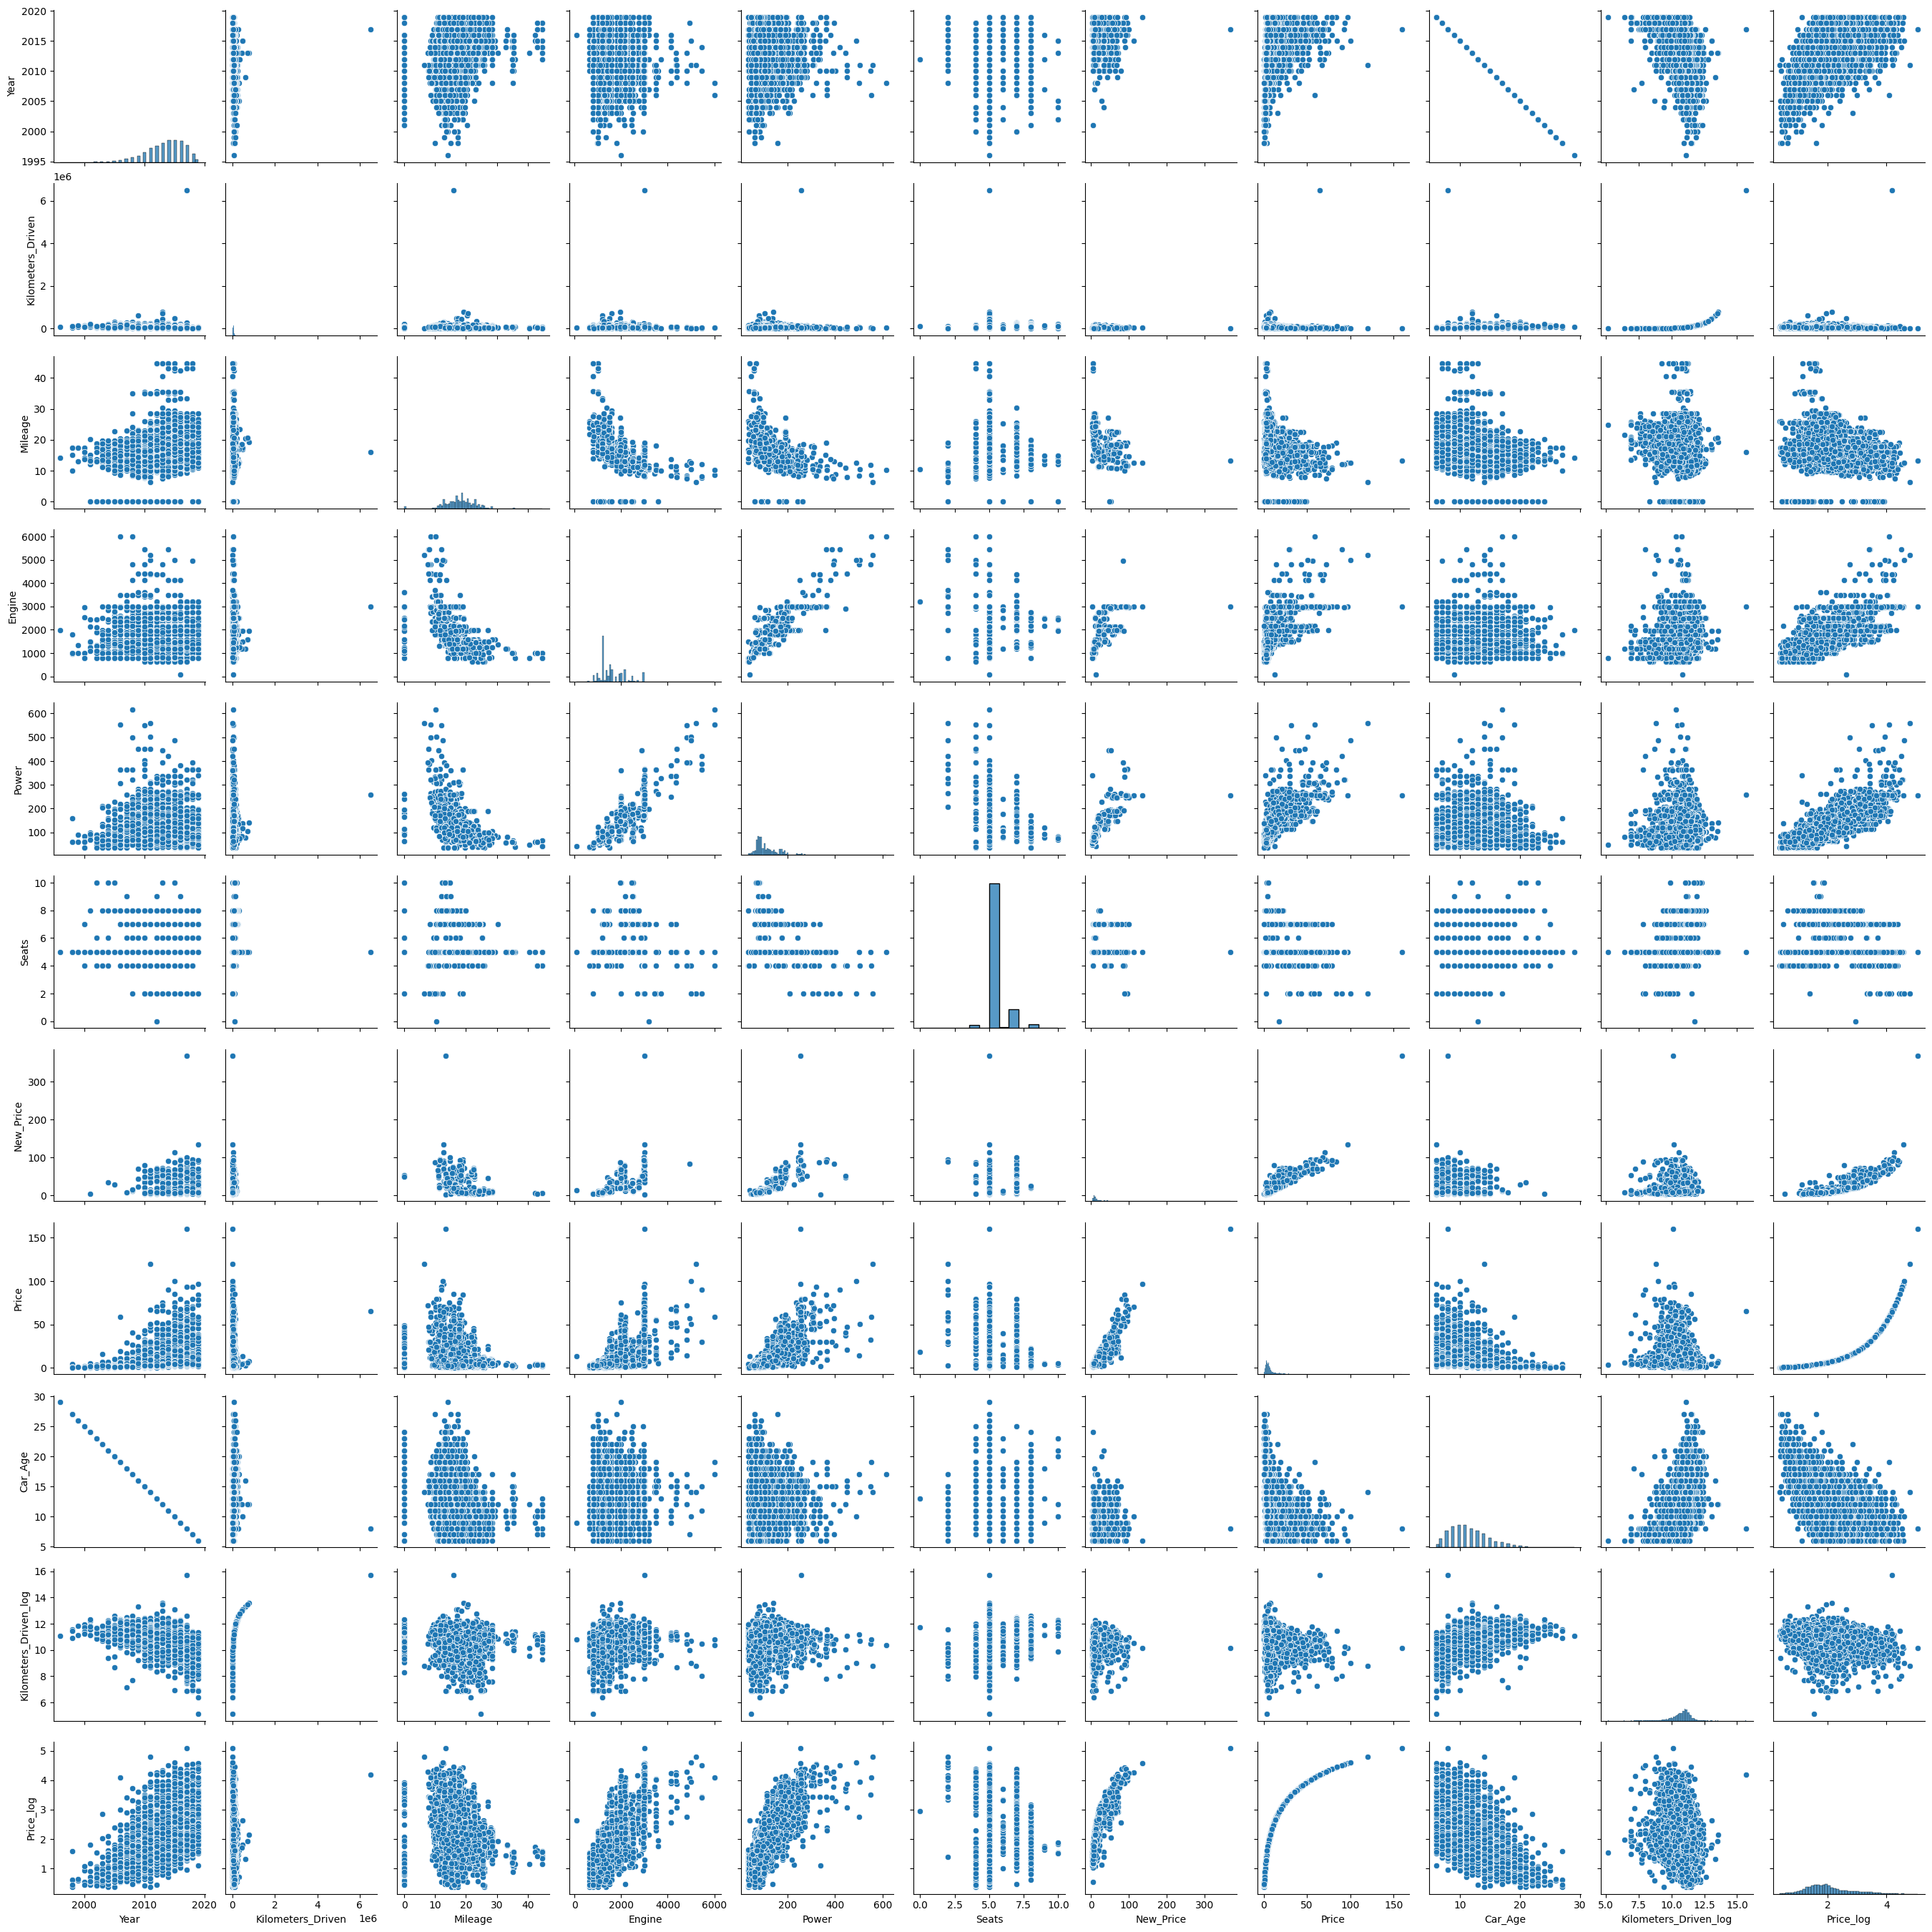

In [27]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()


In [28]:
#Имеет смысл более детально рассмотреть парные графики, сократив набор столбцов.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x1700 with 0 Axes>

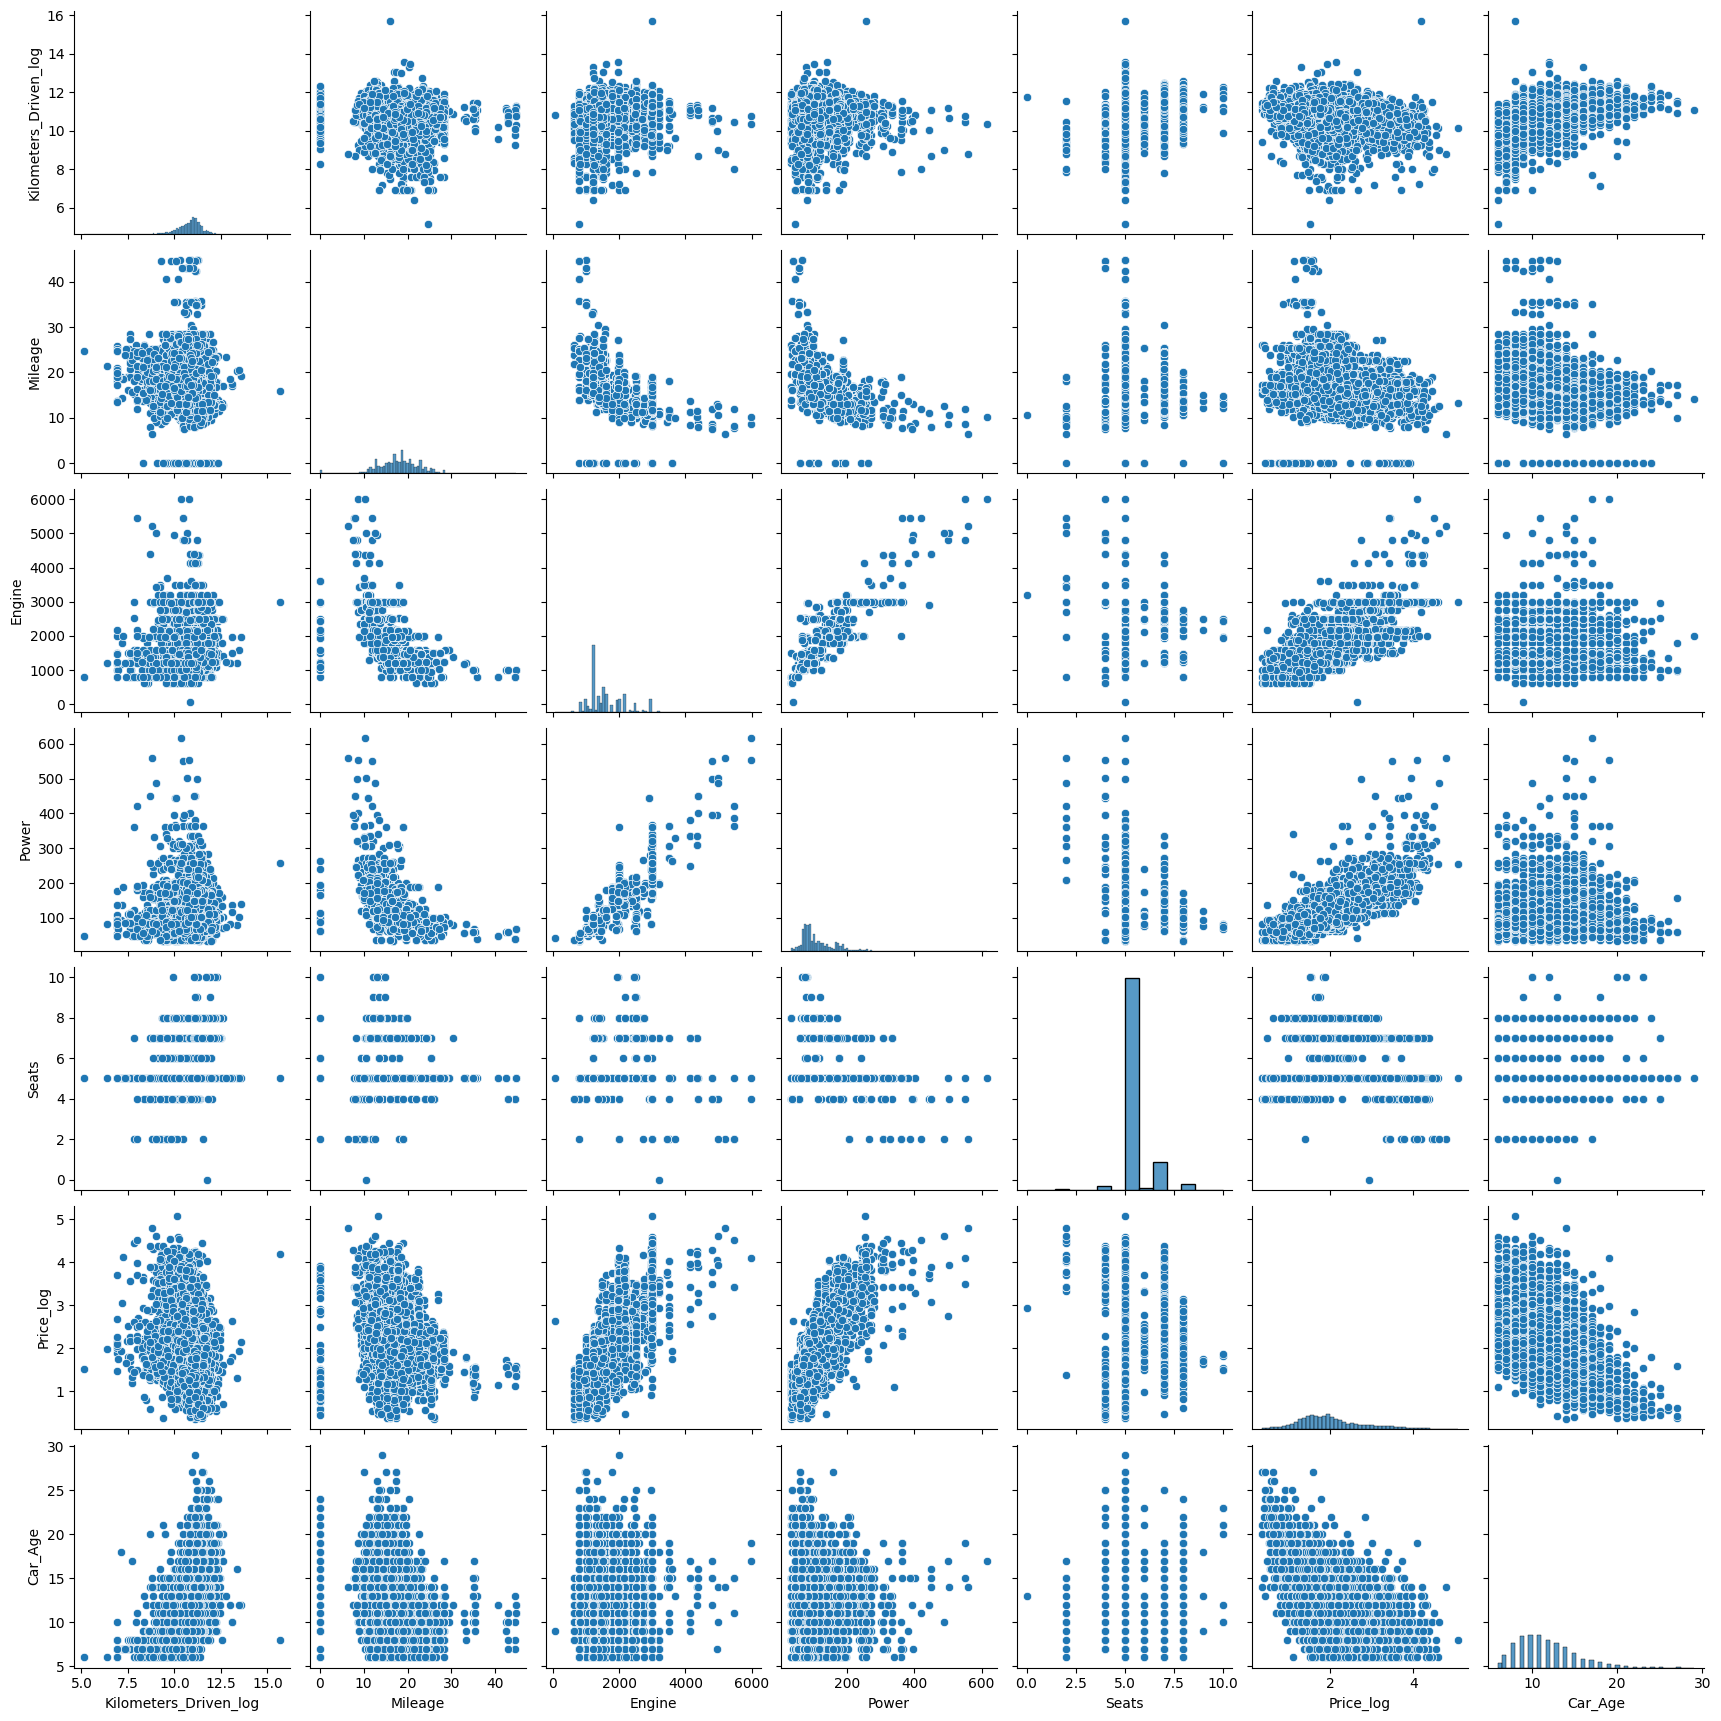

In [29]:
plt.figure(figsize=(13,17))
sns.pairplot(data[['Kilometers_Driven_log', 'Mileage', 'Engine', 'Power', 'Seats', 'Price_log', 'Car_Age']])
plt.show()


* Возраст автомобиля имеет отрицательную корреляцию с ценой и расходом топлива.
* Возраст имеет положительную корреляцию с пройденным километражем.
* Расход топлива отрицательно коррелирует с мощностью.
* С увеличением мощности пробег уменьшается
* Если двигатель и мощность увеличиваются, цена автомобиля тоже увеличивается.


Теперь построим столбчатые диаграммы для анализа влияния категориальных переменных на цену автомобиля.


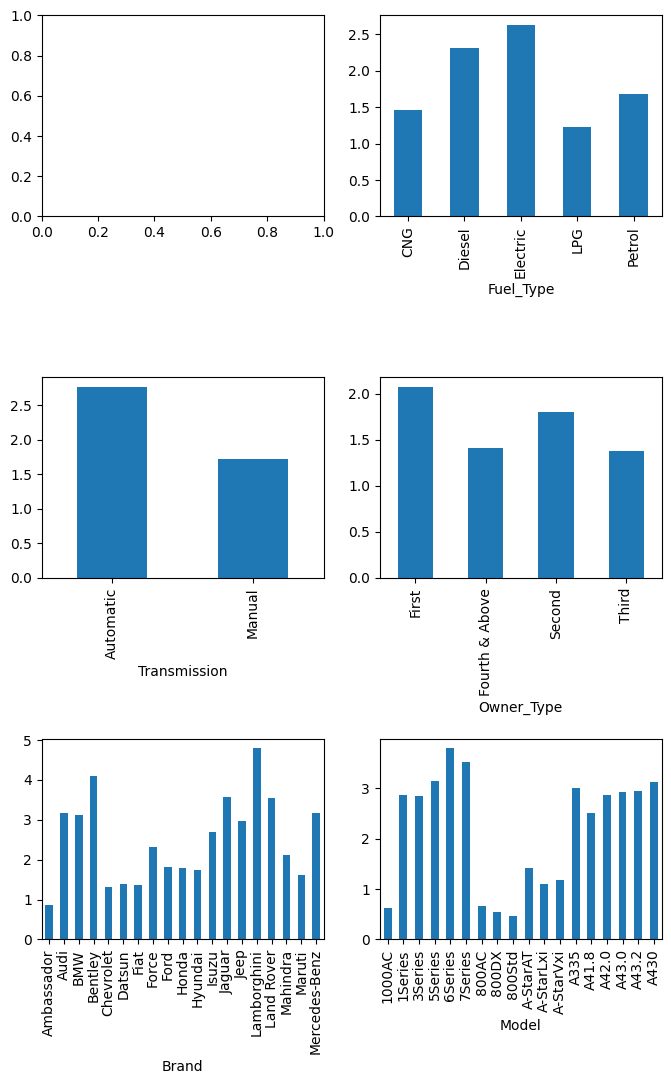

In [39]:
fig, axarr = plt.subplots(3, 2, figsize=(8, 12))
axarr=axarr.flatten()
for i in range(1,len(cat_cols)):
    data.groupby(cat_cols[i])['Price_log'].mean().\
    head(20).dropna().plot.bar(ax=axarr[i])
plt.subplots_adjust(hspace=0.8)
plt.show()


<Axes: xlabel='Brand'>

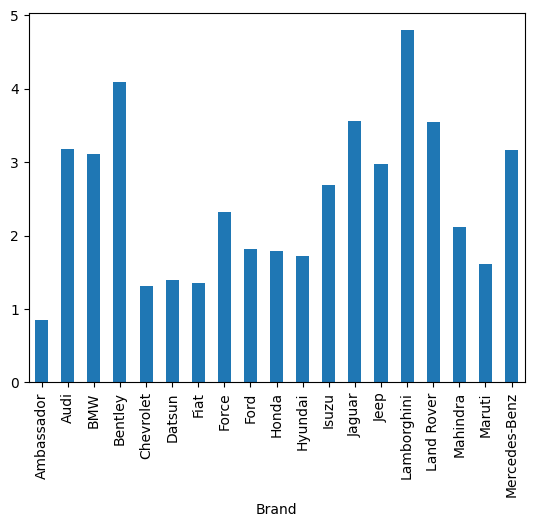

In [35]:
data.groupby('Brand')['Price_log'].mean().\
    head(20).dropna().plot.bar()

Заметим, что переменные Seats и Car_Age являются дискретными, а потому их можно исследовать теми же методами, что категориальные. Построим для них аналогичные диаграммы.


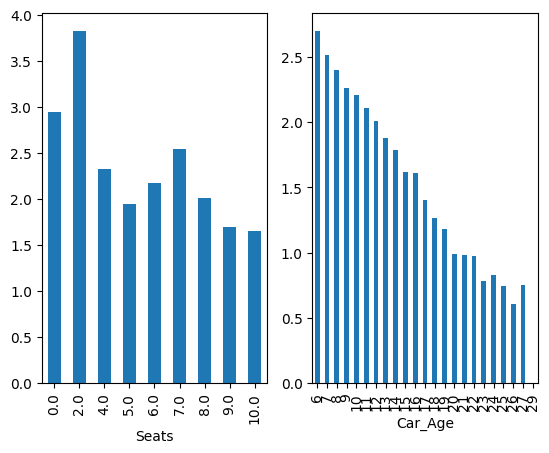

In [36]:
fig, axarr = plt.subplots(1, 2)
data.groupby('Seats')['Price_log'].mean().plot.bar(ax=axarr[0])
data.groupby('Car_Age')['Price_log'].mean().plot.bar(ax=axarr[1])
plt.show()
